#### Google Playstore Case-study


### Problem Statement
- The team at Google play store wants to develop a feature that would enable them to boost visibility for the most promising apps, Now, This analysis would require a preliminary understanding of the features that define a well-performing app.

- you can questions, 
1. Does a higher size or price necessarily mean that an app would perform better than the other apps.
2. or Does a higher number of installs give a clear picture of which app would have a better rating than others?

### Step1: Data visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('googleplaystore_v2.csv')

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
#check the shape of the dataframe
df.shape

(10841, 13)

- Data Handeling and cleaning 
- The first steps involve making sure that there are no missing values or incorrect data types. before we proceed to the analysis stage.

- Missing values- some common techniques to treat this issue are
1. Dropping the rows containing the missing values
2. Imputing the missing values
3. Keep the missing values if they dont affect the analysis.


- Incorrect Data Types:
- clean certain values.
- clean and convert an entire column.

In [5]:
#check the datatypes of all the columns of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  float64
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [6]:
#check the number of null values in the columns
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

- Handling missing values for rating
- Ratings is the target variable
- Drop the records

~ = negation, 
(~True) = False

In [7]:
#Drop the rows having null values in the Rating field
inp1 = df[~df.Rating.isnull()]

In [8]:
df.Rating.isnull()

0        False
1        False
2        False
3        False
4        False
         ...  
10836    False
10837    False
10838     True
10839    False
10840    False
Name: Rating, Length: 10841, dtype: bool

df[...]: The DataFrame df is indexed using the Boolean Series, resulting in a new DataFrame inp1 that contains only the rows where Rating is not null.

In [9]:
inp1.shape

(9367, 13)

In [10]:
df.shape

(10841, 13)

In [11]:
#chek the number of nulls in the rating field again to cross-verify
inp1.Rating.isnull().sum()

0

In [12]:
#Question
#Check the number of nulls in the dataframe again and find the total number of null values
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [13]:
#Inspect the nulls in the Android Version column
inp1[inp1['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [14]:
inp1['Android Ver']

0              4.0.3 and up
1              4.0.3 and up
2              4.0.3 and up
3                4.2 and up
4                4.4 and up
                ...        
10834            4.1 and up
10836            4.1 and up
10837            4.1 and up
10839    Varies with device
10840    Varies with device
Name: Android Ver, Length: 9367, dtype: object

In [15]:
~(inp1['Android Ver'].isnull()) #

0        True
1        True
2        True
3        True
4        True
         ... 
10834    True
10836    True
10837    True
10839    True
10840    True
Name: Android Ver, Length: 9367, dtype: bool

In [16]:
#Drop the rows having shifted Values
inp1.loc[10472, :]
inp1[(inp1['Android Ver'].isnull() & (inp1.Category == "1.9"))]
inp1 = inp1[~(inp1['Android Ver'].isnull() & (inp1.Category == "1.9"))]

#check the nulls again in Anroid Version column to cross-verify
inp1[inp1['Android Ver'].isnull()]



,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


- Imputing the Missing Values
- For numerical variables use mean and median
- For categorical variables use mode.

In [17]:
#Check the most common value in the Android Version column
inp1['Android Ver'].value_counts()

4.1 and up            2059
Varies with device    1319
4.0.3 and up          1240
4.0 and up            1131
4.4 and up             875
2.3 and up             582
5.0 and up             535
4.2 and up             338
2.3.3 and up           240
3.0 and up             211
2.2 and up             208
4.3 and up             207
2.1 and up             113
1.6 and up              87
6.0 and up              48
7.0 and up              41
3.2 and up              31
2.0 and up              27
5.1 and up              18
1.5 and up              16
3.1 and up               8
2.0.1 and up             7
4.4W and up              6
8.0 and up               5
7.1 and up               3
4.0.3 - 7.1.1            2
5.0 - 8.0                2
1.0 and up               2
7.0 - 7.1.1              1
4.1 - 7.1.1              1
5.0 - 6.0                1
Name: Android Ver, dtype: int64

In [18]:
#Fill the nulls in the Android Version column with the above value
inp1['Android Ver'] = inp1['Android Ver'].fillna(inp1['Android Ver'].mode()[0])

In [19]:
#Check the nulls in the android version column again to cross-verify
inp1['Android Ver'].isnull().sum()

0

In [20]:
#check the nulls in the entire dataframe again
inp1.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       4
Android Ver       0
dtype: int64

In [21]:
#Check the most common value  in the current version column
inp1['Current Ver'].value_counts()

Varies with device    1415
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: Current Ver, Length: 2638, dtype: int64

In [22]:
#Replace the nulls in the current version column with the above value
inp1['Current Ver'] = inp1['Current Ver'].fillna(inp1['Current Ver'].mode()[0])

In [23]:
#Question - check the most common value in the current version column again
inp1['Current Ver'].value_counts()

Varies with device    1419
1.0                    458
1.1                    195
1.2                    126
1.3                    120
                      ... 
2.9.10                   1
3.18.5                   1
1.3.A.2.9                1
9.9.1.1910               1
0.3.4                    1
Name: Current Ver, Length: 2638, dtype: int64

### handeling the incorrect Data types

In [24]:
inp1.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


###  break till - 11.00am

In [25]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [26]:
#Question- Try Calculating the average price of all apps having the Anroid Version as "4.1 and up"
inp1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [27]:
#Analyze the price column to check the issue
inp1.Price.value_counts()

0          8719
$2.99       114
$0.99       107
$4.99        70
$1.99        59
           ... 
$1.29         1
$299.99       1
$379.99       1
$37.99        1
$1.20         1
Name: Price, Length: 73, dtype: int64

In [28]:
#Write a funtion to make the changes
inp1.Price = inp1.Price.apply(lambda x: 0 if x== "0" else float(x[1:]))

In [29]:
#Verify the dtype of price once again
inp1.Price.dtype

dtype('float64')

In [30]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [31]:
#Analyse the Reviews Column
inp1.Reviews.value_counts()

2         83
3         78
4         74
5         74
1         67
          ..
49657      1
41420      1
7146       1
44706      1
398307     1
Name: Reviews, Length: 5992, dtype: int64

In [32]:
#Change the dtype of this column
inp1.Reviews = inp1.Reviews.astype("int32")

#check the quantitative spread of this dataframe
inp1.Reviews.describe()

count    9.366000e+03
mean     5.140498e+05
std      3.144042e+06
min      1.000000e+00
25%      1.862500e+02
50%      5.930500e+03
75%      8.153275e+04
max      7.815831e+07
Name: Reviews, dtype: float64

In [33]:
inp1.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [34]:
#Analyse the Installs colunm
inp1.Installs.head()

0        10,000+
1       500,000+
2     5,000,000+
3    50,000,000+
4       100,000+
Name: Installs, dtype: object

In [35]:
#Question clean the Installs column and find the approximate number of apps at the 50th percentile

def clean_installs(val):
    return int(val.replace(",", "").replace("+", ""))


In [36]:
clean_installs(" 50,000,000+")

50000000

In [37]:
inp1.Installs = inp1.Installs.apply(clean_installs)
inp1.Installs.describe()

count    9.366000e+03
mean     1.789744e+07
std      9.123822e+07
min      1.000000e+00
25%      1.000000e+04
50%      5.000000e+05
75%      5.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

- Sanity Checks
- The data we have needs to make sense and therefore you can perform certain sanity checks on them to ensure they are factually correct as well. some sanity checks can be:
- Rating is between 1 and 5 for all the apps.
- Number of Reviews is less than or equal to the number of Installs.
- Free Apps shouldnt have a price greater than 0.

In [38]:
df.Reviews.value_counts()

0         596
1         272
2         214
3         175
4         137
         ... 
342912      1
4272        1
5517        1
4057        1
398307      1
Name: Reviews, Length: 6002, dtype: int64

In [39]:
df.Rating.value_counts()

4.4     1109
4.3     1076
4.5     1038
4.2      952
4.6      823
4.1      708
4.0      568
4.7      499
3.9      386
3.8      303
5.0      274
3.7      239
4.8      234
3.6      174
3.5      163
3.4      128
3.3      102
4.9       87
3.0       83
3.1       69
3.2       64
2.9       45
2.8       42
2.7       25
2.6       25
2.5       21
2.3       20
2.4       19
1.0       16
2.2       14
1.9       13
2.0       12
1.7        8
1.8        8
2.1        8
1.6        4
1.4        3
1.5        3
1.2        1
19.0       1
Name: Rating, dtype: int64

In [40]:
#Perform the sanity checks on the Reviews column
inp1[(inp1.Reviews > inp1.Installs)].shape

(7, 13)

In [41]:
inp1[(inp1.Reviews > inp1.Installs)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25000.000000,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
4663,Alarmy (Sleep If U Can) - Pro,LIFESTYLE,4.8,10249,21516.529524,10000,Paid,2.49,Everyone,Lifestyle,"July 30, 2018",Varies with device,Varies with device
5917,Ra Ga Ba,GAME,5.0,2,20000.000000,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19000.000000,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
7402,Trovami se ci riesci,GAME,5.0,11,6100.000000,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4200.000000,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
10697,Mu.F.O.,GAME,5.0,2,16000.000000,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [42]:
inp1 = inp1[inp1.Reviews <= inp1.Installs]

In [43]:
#Perform the sanity checks on prices of free apps
inp1[(inp1.Type == "Free") & (inp1.Price > 0)] 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


### outliers Analysis using Boxplot

- Now you need to start identifying and removing extreme values or outliers from our dataset.
- These values can tilt our analysis and often provide us with a biassed perspective of the data available.
- This is where you will start utillising visualization to achiever your tasks.
- and the best visualization to use here would be the box plot
- Boxplots are one of the best ways of analysing the spread of a numeric variable.

In [44]:
#Import the plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline

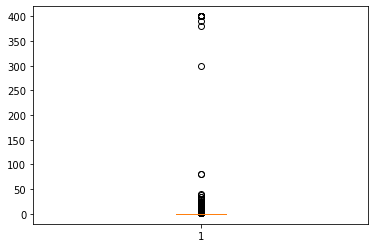

In [45]:
#create a boxplot for the price column
plt.boxplot(inp1.Price)
plt.show()

In [46]:
#check the apps with price more than 200
inp1[(inp1.Price > 200)]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1500.0,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26000.0,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7300.0,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1800.0,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8700.0,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2600.0,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4700.0,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2900.0,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22000.0,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,965.0,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


In [47]:
#clean the price column
inp1 = inp1[inp1.Price < 200]

In [48]:
inp1.Price.describe()

count    9344.000000
mean        0.334463
std         2.169925
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        79.990000
Name: Price, dtype: float64

<AxesSubplot:>

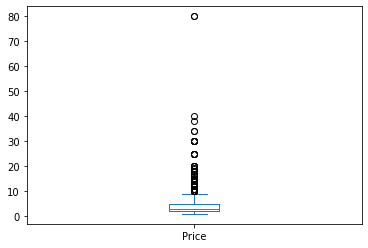

In [49]:
#create a box plot for paid apps
inp1[inp1.Price > 0].Price.plot.box()

In [50]:
#check the apps with price more than 30
inp1[inp1.Price > 30]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2253,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2301,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2365,Vargo Anesthesia Mega App,MEDICAL,4.6,92,32000.0,1000,Paid,79.99,Everyone,Medical,"June 18, 2018",19.0,4.0.3 and up
2402,A Manual of Acupuncture,MEDICAL,3.5,214,68000.0,1000,Paid,33.99,Everyone,Medical,"October 2, 2017",2.1.35,4.0 and up
2414,LTC AS Legal,MEDICAL,4.0,6,1300.0,100,Paid,39.99,Everyone,Medical,"April 4, 2018",3.0.1,4.1 and up
5360,I am Rich Person,LIFESTYLE,4.2,134,1800.0,1000,Paid,37.99,Everyone,Lifestyle,"July 18, 2017",1.0,4.0.3 and up


In [51]:
#clean the price column again
inp1 = inp1[inp1.Price <= 30]
inp1.shape

(9338, 13)

- Histograms
- Histograms can also used in conjuntion with boxplots for data cleaning and data handeling purposes.
- You can use it to check the spread of a numeric variables

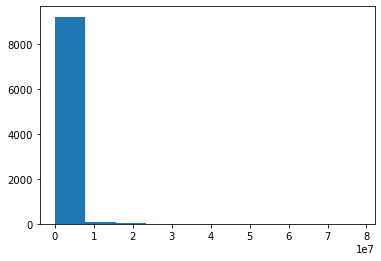

In [52]:
#Create a histogram of the Reviews 
?plt.hist
plt.hist(inp1.Reviews)
plt.show()

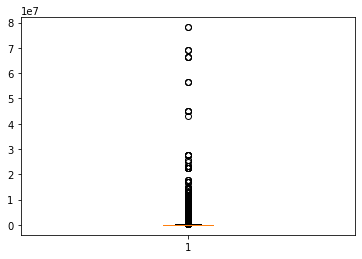

In [53]:
#Create a boxplot of the Reviews column
plt.boxplot(inp1.Reviews)
plt.show()

In [54]:
#check the records with 1 million reviews
inp1[inp1.Reviews >= 10000000]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
335,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
342,Viber Messenger,COMMUNICATION,4.3,11334799,21516.529524,500000000,Free,0.0,Everyone,Communication,"July 18, 2018",Varies with device,Varies with device
378,UC Browser - Fast Download Private & Secure,COMMUNICATION,4.5,17712922,40000.000000,500000000,Free,0.0,Teen,Communication,"August 2, 2018",12.8.5.1121,4.0 and up
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316,21516.529524,1000000000,Free,0.0,Everyone,Communication,"August 3, 2018",Varies with device,Varies with device
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6449,BBM - Free Calls & Messages,COMMUNICATION,4.3,12843436,21516.529524,100000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,4.0.3 and up
7536,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,21516.529524,500000000,Free,0.0,Everyone,Tools,"August 4, 2018",4.6.6,Varies with device
7937,Shadow Fight 2,GAME,4.6,10981850,88000.000000,100000000,Free,0.0,Everyone 10+,Action,"July 2, 2018",1.9.38,3.0 and up
8894,Cache Cleaner-DU Speed Booster (booster & clea...,TOOLS,4.5,12759815,15000.000000,100000000,Free,0.0,Everyone,Tools,"July 25, 2018",3.1.2,4.0 and up


In [55]:
#Drop the above records
inp1 = inp1[inp1.Reviews <= 1000000]
inp1.shape

(8634, 13)

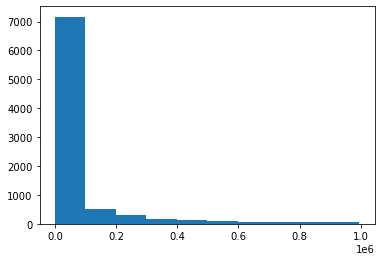

In [56]:
#Question- create a histogram again and check the peaks
plt.hist(inp1.Reviews)
plt.show()

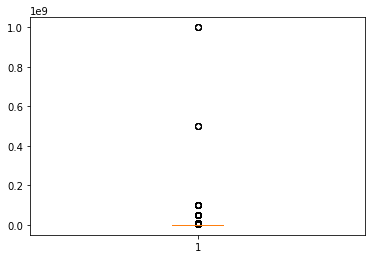

In [57]:
#Question- Create a box plot for the Installs column and report back the IQE
plt.boxplot(inp1.Installs)
plt.show()

In [58]:
inp1.Installs.describe()

count    8.634000e+03
mean     4.288536e+06
std      2.864650e+07
min      5.000000e+00
25%      1.000000e+04
50%      1.000000e+05
75%      1.000000e+06
max      1.000000e+09
Name: Installs, dtype: float64

In [63]:
#Question- clean the Installs by removing all the apps having more than or equal to 100 million installs
inp1 = inp1[inp1.Installs <= 100000000]
inp1.shape

(6506, 13)

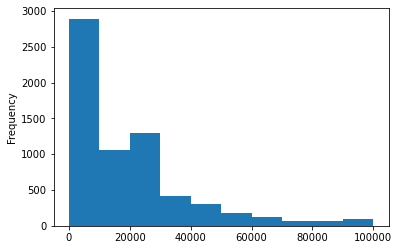

In [64]:
#Plot a histogram for size as well
inp1.Size.plot.hist()
plt.show()

In [65]:
inp1.Size.describe()

count      6506.000000
mean      19486.914663
std       19906.091256
min           8.500000
25%        4800.000000
50%       13000.000000
75%       25000.000000
max      100000.000000
Name: Size, dtype: float64

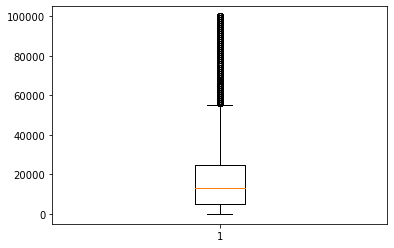

In [66]:
#Question- create a boxplot for this size column and report back the median value 
plt.boxplot(inp1.Size)
plt.show()

### session 2- Data visualization with seaborn


In [67]:
import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns

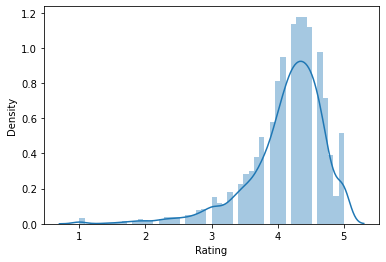

In [68]:
#Create a distribution plot for rating
sns.distplot(inp1.Rating)
plt.show()

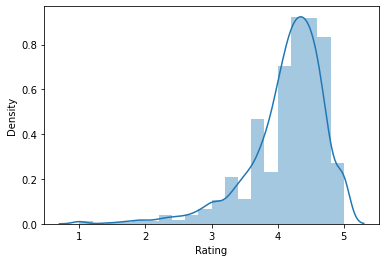

In [70]:
#change the number of bins
sns.distplot(inp1.Rating,  bins = 20)
plt.show()

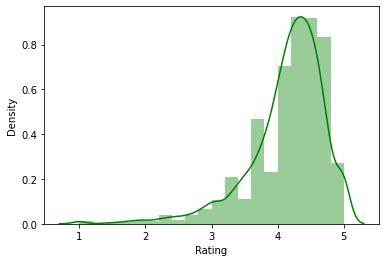

In [71]:
#change the color of bins to green
sns.distplot(inp1.Rating, bins = 20, color = 'g')
plt.show()

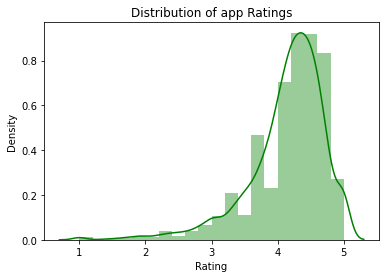

In [72]:
#Apply matplotlib functionalities
sns.distplot(inp1.Rating, bins = 20, color = 'g')
plt.title("Distribution of app Ratings", fontsize = 12)
plt.show()

- styling options
- one of the biggest advantages of using seaborn is that you can retain its aesthetic properties and also the matplotlib functionalities to perform additional customisations.
- before we continue with our case study analysis, lets study the styling options that are available in seaborn

https://seaborn.pydata.org/generated/seaborn.set_style.html

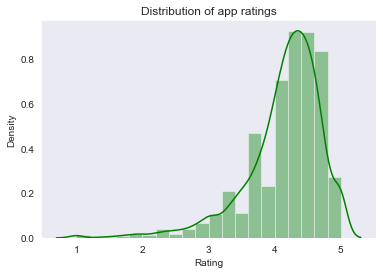

In [74]:
#?sns.set_style
sns.set_style('dark')
sns.distplot(inp1.Rating, bins = 20, color = 'g')
plt.title('Distribution of app ratings', fontsize = 12)
plt.show()

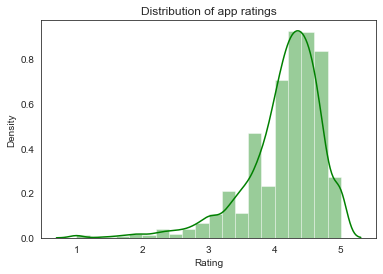

In [75]:
sns.set_style('white')
sns.distplot(inp1.Rating, bins = 20, color = 'g')
plt.title('Distribution of app ratings', fontsize = 12)
plt.show()

In [76]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [77]:
plt.style.use('dark_background')

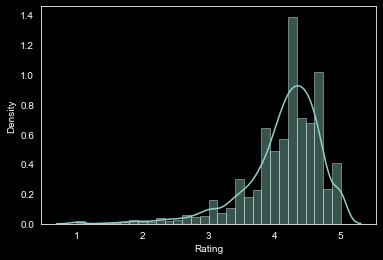

In [78]:
sns.distplot(inp1.Rating, bins = 30)
plt.show()

### Bar chart


In [80]:
#analyse the content Rating column
inp1['Content Rating'].value_counts()

Everyone           5350
Teen                625
Mature 17+          314
Everyone 10+        213
Adults only 18+       3
Unrated               1
Name: Content Rating, dtype: int64

In [81]:
#Remove the rows with values which are less generated
inp1 = inp1[~inp1['Content Rating'].isin(['Adults only 18+', 'Unrated'])]

In [82]:
inp1.shape

(6502, 13)

In [83]:
inp1['Content Rating'].value_counts()

Everyone        5350
Teen             625
Mature 17+       314
Everyone 10+     213
Name: Content Rating, dtype: int64

In [85]:
#Reset the index
inp1.reset_index(inplace = True, drop = True)

In [86]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6502 entries, 0 to 6501
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             6502 non-null   object 
 1   Category        6502 non-null   object 
 2   Rating          6502 non-null   float64
 3   Reviews         6502 non-null   int32  
 4   Size            6502 non-null   float64
 5   Installs        6502 non-null   int64  
 6   Type            6502 non-null   object 
 7   Price           6502 non-null   float64
 8   Content Rating  6502 non-null   object 
 9   Genres          6502 non-null   object 
 10  Last Updated    6502 non-null   object 
 11  Current Ver     6502 non-null   object 
 12  Android Ver     6502 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(8)
memory usage: 635.1+ KB


In [87]:
#Check the apps belonging to different categories of content rating
inp1['Content Rating'].value_counts()

Everyone        5350
Teen             625
Mature 17+       314
Everyone 10+     213
Name: Content Rating, dtype: int64

In [89]:
plt.style.use('default')


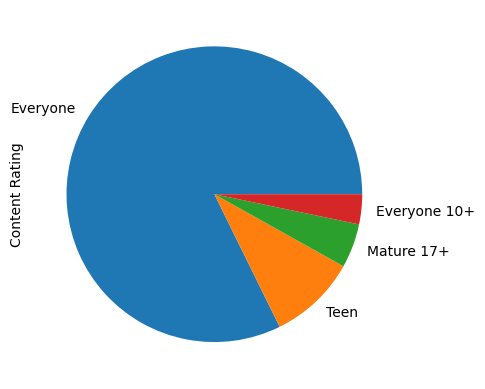

In [90]:
#Plot the pie chart
inp1['Content Rating'].value_counts().plot.pie()
plt.show()

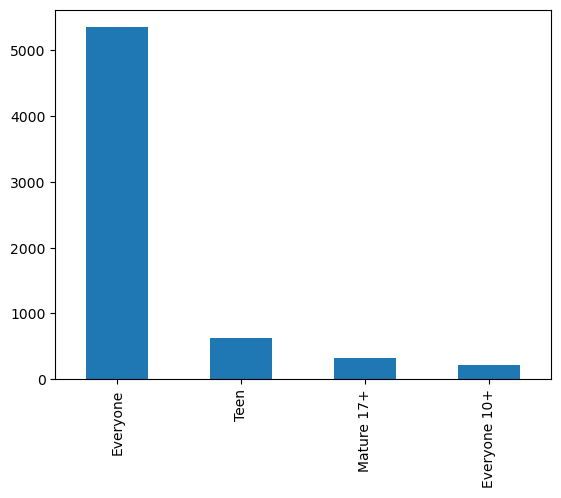

In [91]:
#Plot the bar chart
inp1['Content Rating'].value_counts().plot.bar()
plt.show()

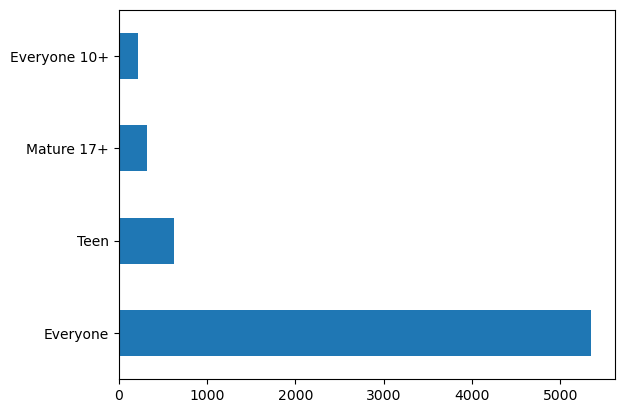

In [92]:
#question- plot the bar chart for checking the 4th highest android version type
inp1['Content Rating'].value_counts().plot.barh()
plt.show()

#scatter plots
- scatterplots are perhaps one of the most commonly used as well one of the most powerful visualization you can use in the field of machine learnig.
- They are pretty crucial in revealing the relationships between the data points and you can generally deduce some sort of trends in the data with the help of a scatter plot.
- They are pretty useful in regression problems to check whether a linear trend exists in the data or not.
- e.g in the image below, creating a linear model in the first case makes far more sense since a clear straight line trend is visible.


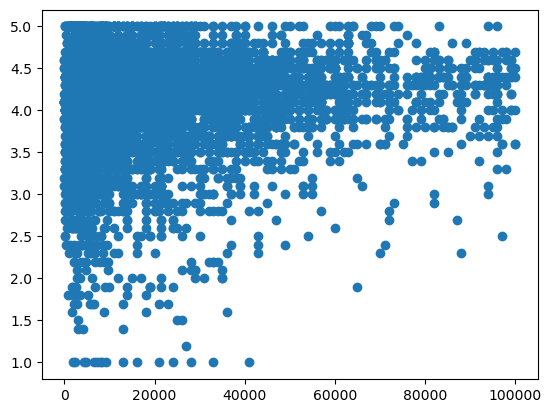

In [94]:
##size vs rating
#plot a scatter plot in the matplotlib way between size and Rating
plt.scatter(inp1.Size, inp1.Rating)
plt.show()

In [95]:
#Plot the same thing now using a jointplot
sns.set_style('white')

In [96]:
?sns.jointplot

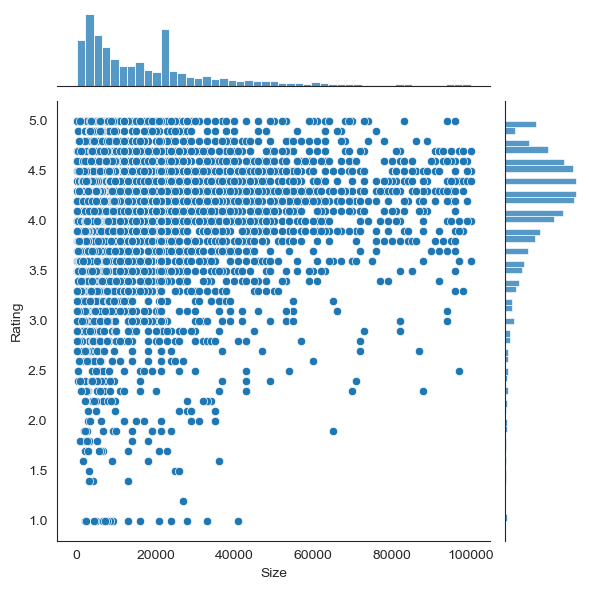

In [98]:
sns.jointplot(inp1.Size, inp1.Rating)
plt.show()

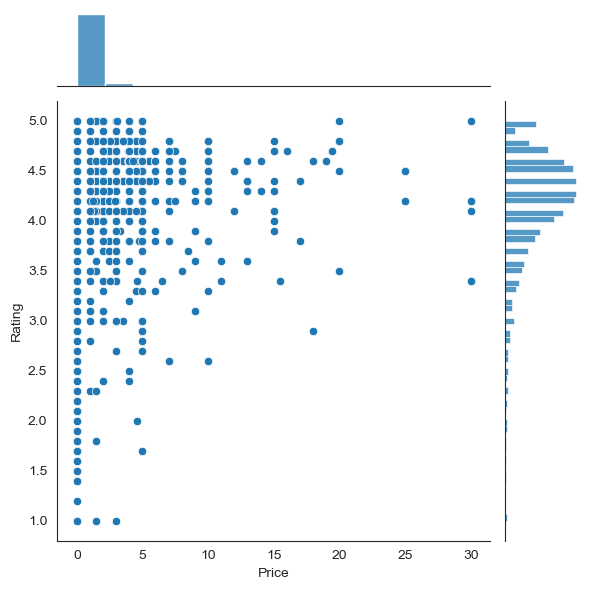

In [99]:
#Plot a jointplot for price and rating 
sns.jointplot(inp1.Price, inp1.Rating)
plt.show()

### Reg plots
- These are an extension to the jointplots, where a regression line is added to the view

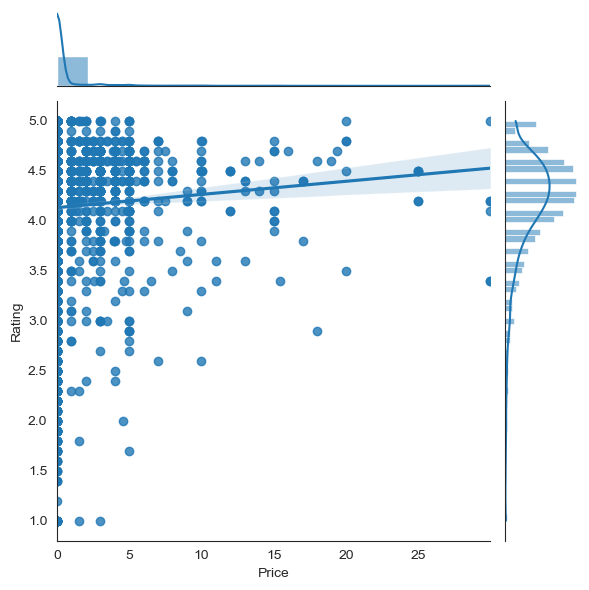

In [100]:
#plot a reg plot for price and Rating and observe the trend
sns.jointplot(inp1.Price, inp1.Rating, kind = 'reg')
plt.show()

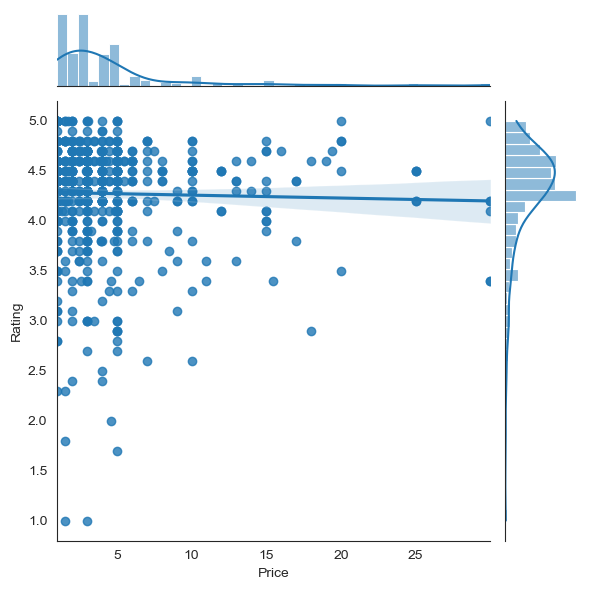

In [102]:
#Question- plot a reg plot for Price and Rating again for only the paid apps
sns.jointplot("Price", 'Rating', data = inp1[inp1.Price > 0], kind = 'reg')
plt.show()

- break till 12.08pm

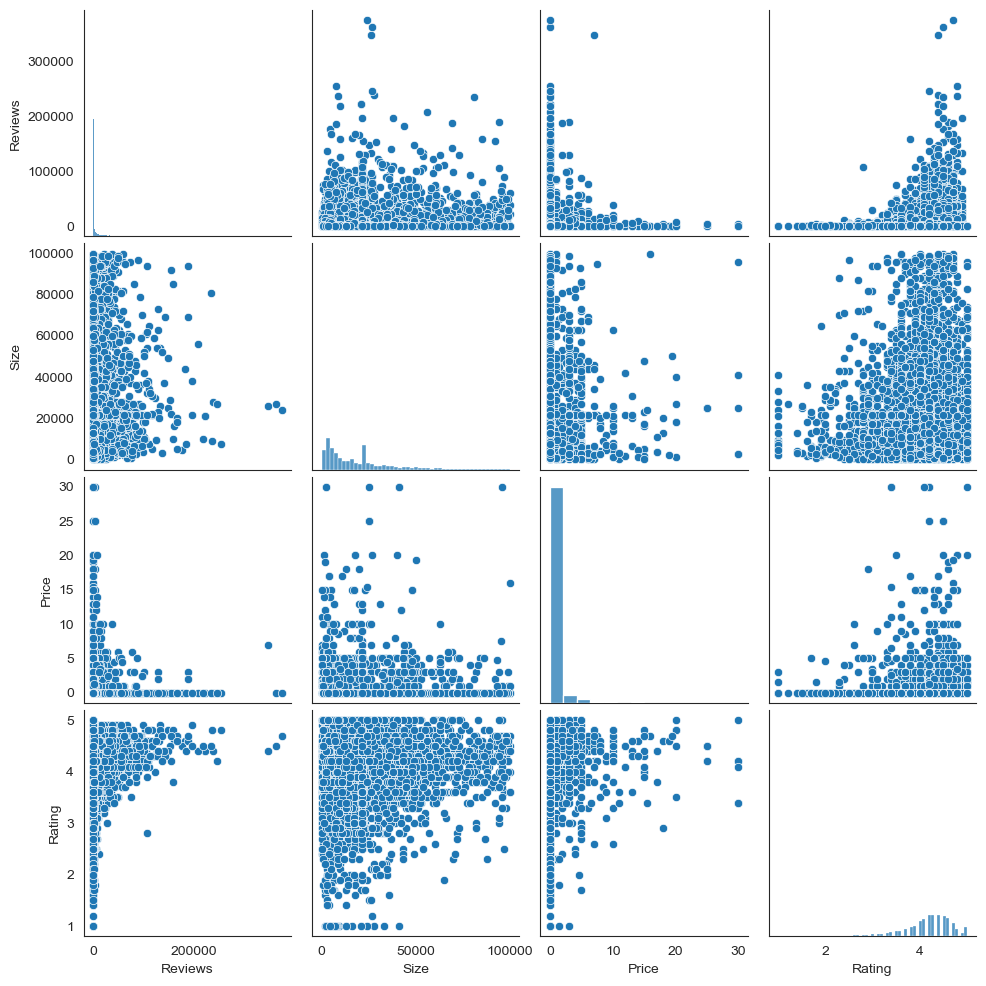

In [103]:
sns.pairplot(inp1[['Reviews', 'Size', 'Price', 'Rating']])
plt.show()

<AxesSubplot:xlabel='Content Rating'>

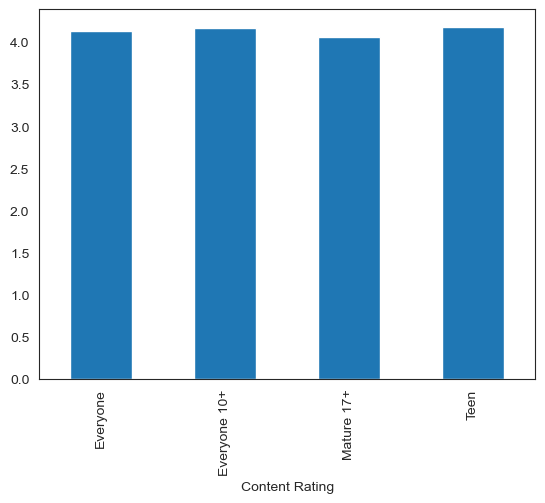

In [104]:
inp1.groupby(['Content Rating'])['Rating'].mean().plot.bar()

<AxesSubplot:xlabel='Content Rating'>

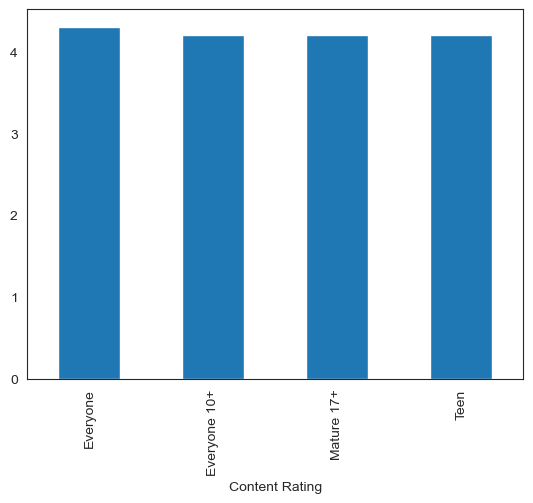

In [105]:
#Plot the bar plot again with Meadin Rating
inp1.groupby(['Content Rating'])['Rating'].median().plot.bar()

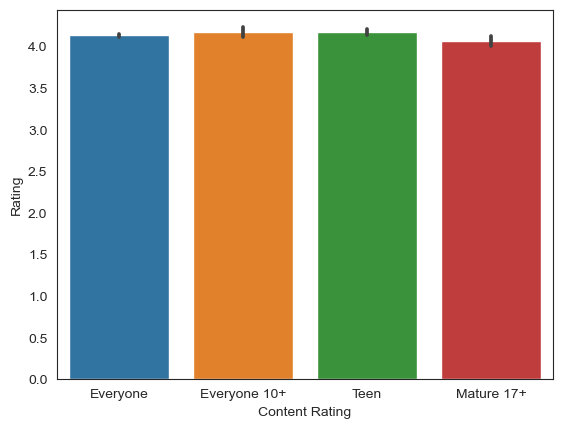

In [106]:
sns.barplot(data = inp1, x = 'Content Rating', y = 'Rating')

plt.show()

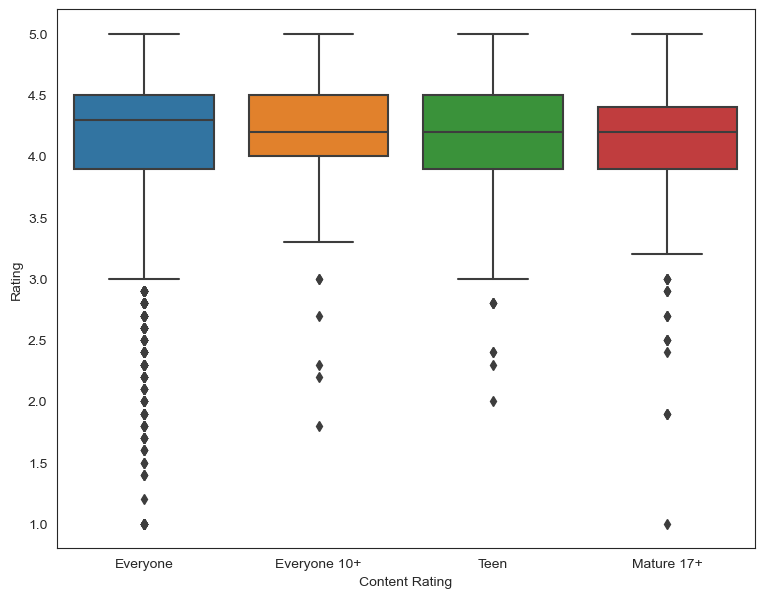

In [107]:
##plot a boxplot of rating vs content Rating
plt.figure(figsize = [9,7])
sns.boxplot(inp1['Content Rating'], inp1.Rating)
plt.show()

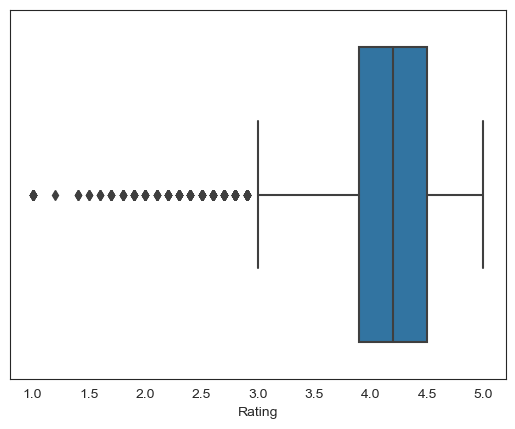

In [108]:
##Question- plot a boxplot for the Rating Column Only
sns.boxplot(inp1.Rating)
plt.show()

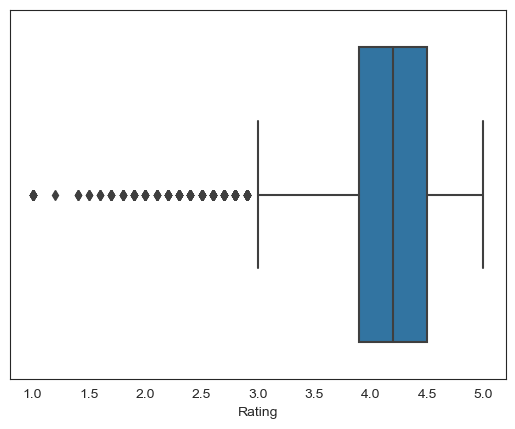

In [109]:
#Question- plot a boxplot for the rating column only
sns.boxplot(inp1.Rating)
plt.show()

In [110]:
##Question- plot a boxplot of Ratings across the 4 most popular genre
inp1['Genres'].value_counts()

Tools                                  545
Education                              418
Entertainment                          405
Medical                                341
Finance                                269
                                      ... 
Health & Fitness;Action & Adventure      1
Travel & Local;Action & Adventure        1
Entertainment;Education                  1
Health & Fitness;Education               1
Strategy;Creativity                      1
Name: Genres, Length: 108, dtype: int64

In [111]:
c = ['Tools', 'Education', 'Entertainment', 'Medical']
inp5 = inp1[inp1['Genres'].isin(c)]

<AxesSubplot:xlabel='Genres', ylabel='Rating'>

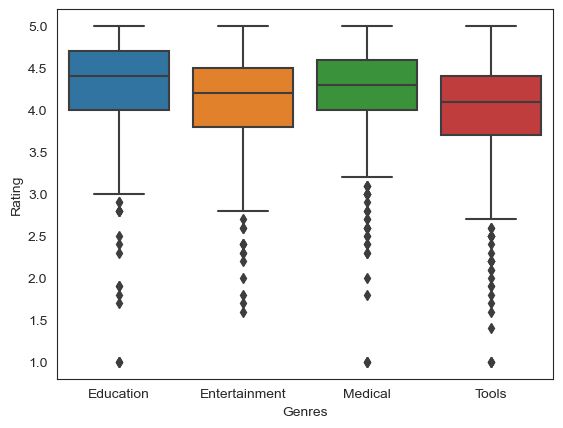

In [113]:
sns.boxplot(inp5['Genres'],inp1.Rating)

In [114]:
#Heatmaps
#ratings vs size vs content rating

In [115]:
inp1['Size_Bucket'] = pd.qcut(inp1.Size, [0,0.2,0.4,0.6,0.8,1], ["VL", "L", "M", "H", "VH"])

In [117]:
#Create a pivot table for Size_buckets and content rating with values set to Rating
inp1.head()
pd.pivot_table(data = inp1, index = "Content Rating", columns = "Size_Bucket", values = "Rating")

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.093258,4.141537,4.161840,4.160878,4.134330
Everyone 10+,4.072727,4.254545,4.241026,4.181132,4.130682
Mature 17+,3.796154,4.180645,3.845833,4.148101,4.192000
Teen,4.236364,4.202000,4.130000,4.171756,4.192424


In [118]:
#change the aggregation to median
pd.pivot_table(data = inp1, index = 'Content Rating', columns = 'Size_Bucket', values = 'Rating', aggfunc = np.median)

Size_Bucket,VL,L,M,H,VH
Content Rating,,,,,
Everyone,4.2,4.30,4.30,4.3,4.3
Everyone 10+,4.1,4.35,4.30,4.3,4.2
Mature 17+,3.8,4.20,3.95,4.2,4.1
Teen,4.3,4.30,4.20,4.2,4.2


In [120]:
res = pd.pivot_table(data = inp1, index = 'Content Rating', columns = 'Size_Bucket', values = 'Rating', aggfunc = lambda x: np.quantile(x, 0.2))

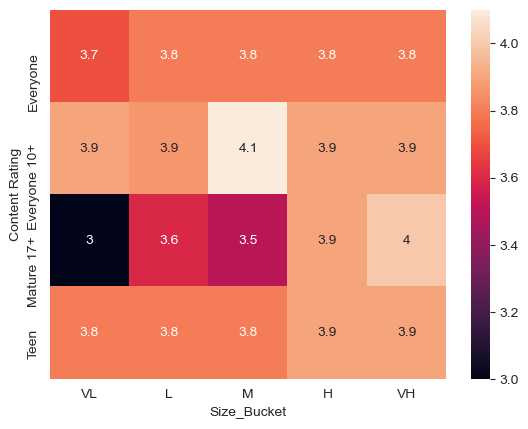

In [122]:
sns.heatmap(res, annot = True)
plt.show()

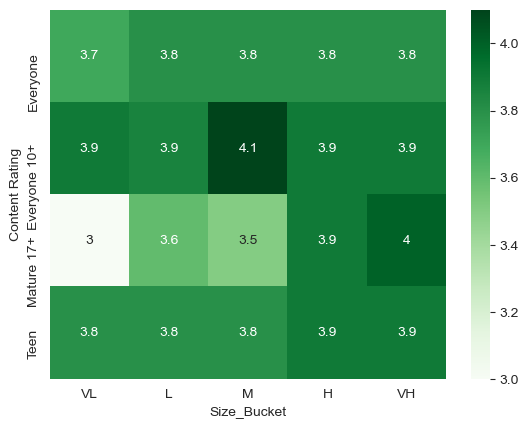

In [123]:
#apply customization
sns.heatmap(res, cmap = "Greens", annot = True)
plt.show()

In [124]:
#additional Visualizations


In [125]:
inp1['Last Updated'].head()

0     January 7, 2018
1    January 15, 2018
2       June 20, 2018
3      March 26, 2017
4      April 26, 2018
Name: Last Updated, dtype: object

In [129]:
## Pd.to_datetime

In [126]:
inp1['updated_month'] = pd.to_datetime(inp1['Last Updated']).dt.month

In [127]:
## Find the average rating across all the months
inp1.groupby(['updated_month'])['Rating'].mean()

updated_month
1     4.143149
2     4.072629
3     4.095031
4     4.125505
5     4.128169
6     4.144154
7     4.186323
8     4.234124
9     4.039738
10    4.000360
11    4.092400
12    4.051228
Name: Rating, dtype: float64

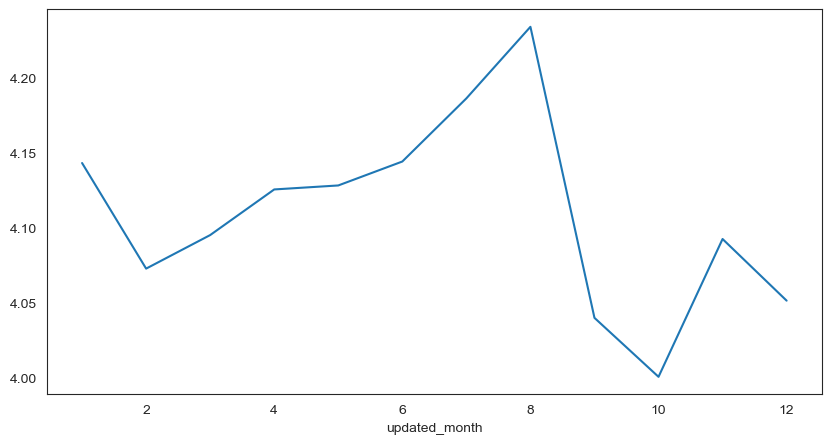

In [128]:
#Plot a line graph
plt.figure(figsize = [10,5])
inp1.groupby(['updated_month'])['Rating'].mean().plot()
plt.show()

#### stacked bar charts